<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_Junho_2020/blob/master/ANN_segmentacao_tensor_OUR_v11_junho_02_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import pandas as pd


In [2]:
!pip install mahotas

In [0]:
import mahotas.features.texture as mht
import mahotas.features

In [4]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020

import Go2BlackWhite
import Go2Mahotas

fatal: destination path 'marquesgabi_fev_2020' already exists and is not an empty directory.
/content/marquesgabi_fev_2020


In [0]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

In [6]:
''''''
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado
Transfere='Fotos9Amostras720_e_varios_graos.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()


fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado


In [7]:
labels = []
images = []
with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    #images.append(skimage.data.imread(f))
    images.append(cv2.imread(f))
    labels.append(f)
 # labels.append(int(d))\
'''
 with zipfile.ZipFile(Transfere, "r") as f:
    for name in f.namelist():
      img_name.append(name)
      #xw.append(cv2.imread(name))
'''

'\n with zipfile.ZipFile(Transfere, "r") as f:\n    for name in f.namelist():\n      img_name.append(name)\n      #xw.append(cv2.imread(name))\n'

In [8]:
print(labels)
#print(images)
np.array(images).shape

['Q6-1-2-G1.jpg', 'Q6-1-2-G10.jpg', 'Q6-1-2-G11.jpg', 'Q6-1-2-G12.jpg', 'Q6-1-2-G13.jpg', 'Q6-1-2-G14.jpg', 'Q6-1-2-G15.jpg', 'Q6-1-2-G16.jpg', 'Q6-1-2-G17.jpg', 'Q6-1-2-G18.jpg', 'Q6-1-2-G19.jpg', 'Q6-1-2-G2.jpg', 'Q6-1-2-G20.jpg', 'Q6-1-2-G3.jpg', 'Q6-1-2-G4.jpg', 'Q6-1-2-G5.jpg', 'Q6-1-2-G6.jpg', 'Q6-1-2-G7.jpg', 'Q6-1-2-G8.jpg', 'Q6-1-2-G9.jpg', 'Q6-1-2-V1.jpg', 'Q6-1-2-V2.jpg', 'Q6-1-2-V3.jpg', 'Q6-1-2-V4.jpg', 'Q6-1-2-V5.jpg', 'Q6-1-2-V6.jpg', 'Q6-1-4-B1.jpg', 'Q6-1-4-B10.jpg', 'Q6-1-4-B2.jpg', 'Q6-1-4-B3.jpg', 'Q6-1-4-B4.jpg', 'Q6-1-4-B5.jpg', 'Q6-1-4-B6.jpg', 'Q6-1-4-B7.jpg', 'Q6-1-4-B8.jpg', 'Q6-1-4-B9.jpg', 'Q6-1-4-G1.jpg', 'Q6-1-4-G10.jpg', 'Q6-1-4-G2.jpg', 'Q6-1-4-G3.jpg', 'Q6-1-4-G4.jpg', 'Q6-1-4-G5.jpg', 'Q6-1-4-G6.jpg', 'Q6-1-4-G7.jpg', 'Q6-1-4-G8.jpg', 'Q6-1-4-G9.jpg', 'Q6-1-4-I1.jpg', 'Q6-1-4-I10.jpg', 'Q6-1-4-I2.jpg', 'Q6-1-4-I3.jpg', 'Q6-1-4-I4.jpg', 'Q6-1-4-I5.jpg', 'Q6-1-4-I6.jpg', 'Q6-1-4-I7.jpg', 'Q6-1-4-I8.jpg', 'Q6-1-4-I9.jpg', 'Q6-1-4-V1.jpg', 'Q6-1-4-V2.jpg',

(882,)

In [9]:
'''
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size)
plt.axis("off")
plt.imshow(ww[10], cmap = "gray")
'''

'\nww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size)\nplt.axis("off")\nplt.imshow(ww[10], cmap = "gray")\n'

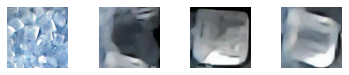

In [10]:
# Import the 'pyplot' module of 'matplotlib'
import matplotlib.pyplot as plt

# Determine the (random) indexes of the images that you want to see 
traffic_signs = [25, 30, 36, 40]

# Fill out the subplots with the random images that you defined 
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)

plt.show()

In [0]:
# Import the `transform` module from `skimage`
from skimage import transform 

# Rescale the images in the `images` array
images28 = [transform.resize(image, (28, 28)) for image in images]

In [0]:
# Import `rgb2gray` from `skimage.color`
from skimage.color import rgb2gray

# Convert `images28` to an array
images28 = np.array(images28)

# Convert `images28` to grayscale
images28 = rgb2gray(images28)

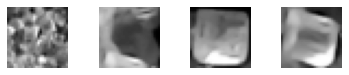

In [13]:
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images28[traffic_signs[i]], cmap="gray")
    plt.subplots_adjust(wspace=0.5)
    
# Show the plot
plt.show()

In [14]:
y_valor=[]

img_name=labels

Graos='G' # numero 1
Indef='I' # numero 2
Buraco='B' # numero 3
Varios='V' # numero 4

for x in img_name:
  if re.search(Graos, x):
    y_valor.append(1)
  elif re.search(Indef, x):
    y_valor.append(2)
  elif re.search(Buraco, x):
    y_valor.append(3)
  else:
    y_valor.append(4)
    
print(y_valor)
print(len(y_valor))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 3, 3, 3, 

In [0]:
#sparse_softmax_cross_entropy_with_logits()

In [16]:
'''
# Import 'tensorflow'
import tensorflow as tf 

# Initialize placeholders 
x = tf.placeholder(dtype = tf.float32, shape = [None, 28, 28])
y = tf.placeholder(dtype = tf.int32, shape = [None])

# Flatten the input data
images_flat = tf.contrib.layers.flatten(x)
'''

"\n# Import 'tensorflow'\nimport tensorflow as tf \n\n# Initialize placeholders \nx = tf.placeholder(dtype = tf.float32, shape = [None, 28, 28])\ny = tf.placeholder(dtype = tf.int32, shape = [None])\n\n# Flatten the input data\nimages_flat = tf.contrib.layers.flatten(x)\n"

In [17]:
'''
W_train, W_test, yw_train, yw_test = train_test_split(np.array(ww), np.array(y_valor), 
                                                    test_size=0.30, 
                                                    random_state=42)
'''                                          

'\nW_train, W_test, yw_train, yw_test = train_test_split(np.array(ww), np.array(y_valor), \n                                                    test_size=0.30, \n                                                    random_state=42)\n'

In [0]:

W_train, W_test, yw_train, yw_test = train_test_split(np.array(images28), np.array(y_valor), 
                                                    test_size=0.30, 
                                                    random_state=42)

In [19]:
print(len(yw_train))
print(len(yw_test))

617
265


In [0]:
train_images=W_train
train_labels=yw_train
test_images=W_test
test_labels=yw_test

In [21]:

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])
''''''

''

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
20/20 [==============================] - 0s 2ms/step - loss: 1.2903 - accuracy: 0.4895
Epoch 2/10
20/20 [==============================] - 0s 2ms/step - loss: 0.9697 - accuracy: 0.6013
Epoch 3/10
20/20 [==============================] - 0s 2ms/step - loss: 0.9067 - accuracy: 0.6240
Epoch 4/10
20/20 [==============================] - 0s 2ms/step - loss: 0.8014 - accuracy: 0.6872
Epoch 5/10
20/20 [==============================] - 0s 2ms/step - loss: 0.7589 - accuracy: 0.6872
Epoch 6/10
20/20 [==============================] - 0s 2ms/step - loss: 0.6816 - accuracy: 0.7407
Epoch 7/10
20/20 [==============================] - 0s 2ms/step - loss: 0.6773 - accuracy: 0.7115
Epoch 8/10
20/20 [==============================] - 0s 2ms/step - loss: 0.6180 - accuracy: 0.7585
Epoch 9/10
20/20 [==============================] - 0s 2ms/step - loss: 0.6260 - accuracy: 0.7455
Epoch 10/10
20/20 [==============================] - 0s 2ms/step - loss: 0.6120 - accuracy: 0.7358


In [0]:
#print(type(train_images))
#print(train_images[2])

In [25]:
predictions = model.predict(train_images) #x_test[:3])
print('predictions shape:', predictions.shape)

predictions shape: (617, 10)


In [26]:
print(predictions)

[[ -5.542971    7.122497    5.1637053 ...  -6.82383    -4.6506624
   -6.2738004]
 [ -6.7286515  11.352445    5.416806  ...  -8.252901   -5.447788
   -7.6065626]
 [ -7.914586    6.0817447   8.155603  ... -10.487975   -7.6269517
  -10.112806 ]
 ...
 [ -6.2617445  11.233617    5.139712  ...  -8.066357   -5.1293573
   -6.349441 ]
 [ -6.572531    9.284548    5.6411653 ...  -8.298462   -5.759719
   -7.78684  ]
 [ -3.5233328   0.8614697   2.9441755 ...  -4.2463207  -3.376557
   -5.2481437]]


In [27]:
print(train_images.shape)

(617, 28, 28)


In [28]:
#print(train_images[0])
result = model.evaluate(train_images) # esta estranho
print(result)
result = model.predict(train_images) # esta estranho
print(result)

20/20 [==============================] - 0s 969us/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
[0.0, 0.0]
[[ -5.542971    7.122497    5.1637053 ...  -6.82383    -4.6506624
   -6.2738004]
 [ -6.7286515  11.352445    5.416806  ...  -8.252901   -5.447788
   -7.6065626]
 [ -7.914586    6.0817447   8.155603  ... -10.487975   -7.6269517
  -10.112806 ]
 ...
 [ -6.2617445  11.233617    5.139712  ...  -8.066357   -5.1293573
   -6.349441 ]
 [ -6.572531    9.284548    5.6411653 ...  -8.298462   -5.759719
   -7.78684  ]
 [ -3.5233328   0.8614697   2.9441755 ...  -4.2463207  -3.376557
   -5.2481437]]


In [0]:
Size=1200 # tamanho da foto
Sub_Size=int(Size/5) # tamanho do fracionamento
Row_Crop=1/2 # posicao do corte
Crop=int(Size*Row_Crop)

In [0]:
# img = img_as_float(astronaut()[::2, ::2])

Transfere='Fotos_Grandes_3cdAmostra.zip'
#Nome='Q6-1-4.jpg'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()
#img=cv2.imread(Nome)

In [0]:
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size)
img=ww[0]

In [32]:
print(img.shape)

(1200, 1200)


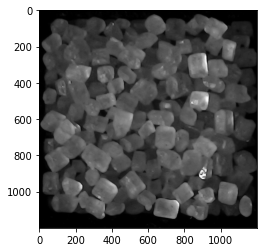

In [33]:
plt.imshow(img, cmap = "gray")

In [0]:
a=0
b=1200
c=100
d=200
Num=50
ww=[]
label=[]

for i in range(Num):
  #x=random.randint(a, b)
  #y=random.randint(a, b)
  #Width=random.randint(c, d)
  x=randint(a, b)
  y=randint(a, b)
  Width=randint(c, d)
  img_1st=np.zeros((Width,Width)).astype(np.int64)

  for i in range(Width):
    for j in range(Width):

      size_x=Width+x
      size_y=Width+y
    
      if(size_x>=Size):
        x=Size-Width

      if(size_y>= Size):
        y=Size-Width

      img_1st[i,j]=np.copy(img[i+y,j+x])
  ww.append(img_1st)
  nome = "W=" + str(Width)+" x="+str(x)+" y="+str(y)
  label.append(nome)


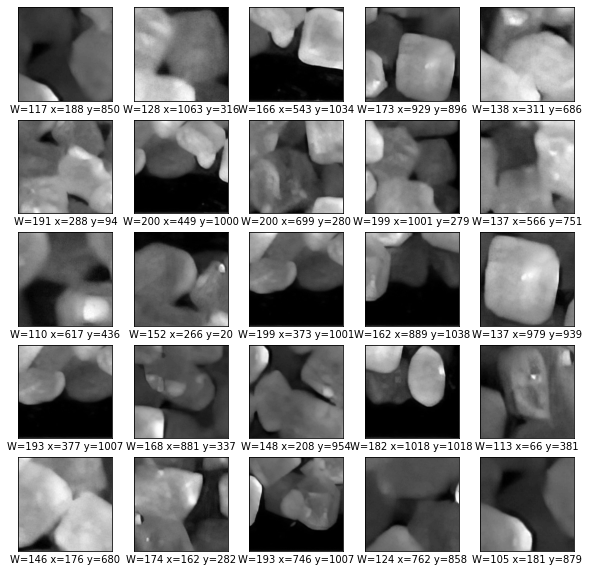

In [35]:
Num=25
plt.figure(figsize=(10,10))
for i in range(Num):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(ww[i], cmap = "gray")
    plt.xlabel(label[i])
plt.show()


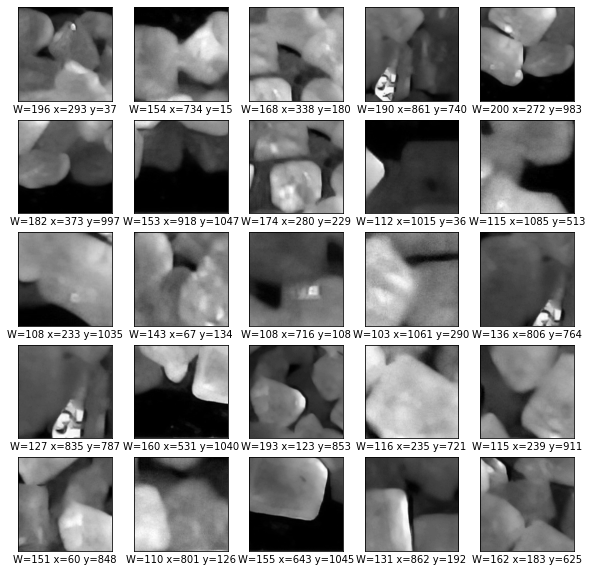

In [36]:
Num=25
plt.figure(figsize=(10,10))
for i in range(Num):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(ww[i+25], cmap = "gray")
    plt.xlabel(label[i+25])
plt.show()

In [37]:
print(label)

['W=117 x=188 y=850', 'W=128 x=1063 y=316', 'W=166 x=543 y=1034', 'W=173 x=929 y=896', 'W=138 x=311 y=686', 'W=191 x=288 y=94', 'W=200 x=449 y=1000', 'W=200 x=699 y=280', 'W=199 x=1001 y=279', 'W=137 x=566 y=751', 'W=110 x=617 y=436', 'W=152 x=266 y=20', 'W=199 x=373 y=1001', 'W=162 x=889 y=1038', 'W=137 x=979 y=939', 'W=193 x=377 y=1007', 'W=168 x=881 y=337', 'W=148 x=208 y=954', 'W=182 x=1018 y=1018', 'W=113 x=66 y=381', 'W=146 x=176 y=680', 'W=174 x=162 y=282', 'W=193 x=746 y=1007', 'W=124 x=762 y=858', 'W=105 x=181 y=879', 'W=196 x=293 y=37', 'W=154 x=734 y=15', 'W=168 x=338 y=180', 'W=190 x=861 y=740', 'W=200 x=272 y=983', 'W=182 x=373 y=997', 'W=153 x=918 y=1047', 'W=174 x=280 y=229', 'W=112 x=1015 y=36', 'W=115 x=1085 y=513', 'W=108 x=233 y=1035', 'W=143 x=67 y=134', 'W=108 x=716 y=108', 'W=103 x=1061 y=290', 'W=136 x=806 y=764', 'W=127 x=835 y=787', 'W=160 x=531 y=1040', 'W=193 x=123 y=853', 'W=116 x=235 y=721', 'W=115 x=239 y=911', 'W=151 x=60 y=848', 'W=110 x=801 y=126', 'W=1

In [0]:
#img = ww[0].reshape((28,28))
#ww[0].shape
#ww[0].size

In [39]:
'''
img=ww[0]
basewidth = 28 # MNIST image width
#img = Image.open('your_input_img.jpg')
wpercent = (basewidth/float(img.shape[0]))
hsize = int((float(img.shape[1])*float(wpercent)))
#img = img.resize((basewidth,hsize), Image.ANTIALIAS)
img = img.resize((basewidth,hsize))
'''

"\nimg=ww[0]\nbasewidth = 28 # MNIST image width\n#img = Image.open('your_input_img.jpg')\nwpercent = (basewidth/float(img.shape[0]))\nhsize = int((float(img.shape[1])*float(wpercent)))\n#img = img.resize((basewidth,hsize), Image.ANTIALIAS)\nimg = img.resize((basewidth,hsize))\n"

In [40]:
print(np.array(ww[0]))

[[ 48  48  47 ... 113 110 106]
 [ 48  49  47 ... 111 108 106]
 [ 48  49  50 ... 108 107 108]
 ...
 [110 111 110 ...  79  75  71]
 [109 108 110 ...  70  67  62]
 [108 108 109 ...  60  56  52]]


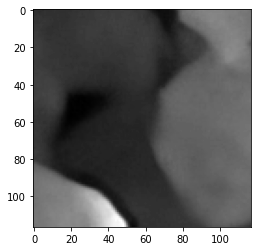

In [41]:
plt.imshow(ww[0], cmap = "gray")

In [42]:
'''
xw=[]
Size=28
for i in range(Num):
  xw.append(cv2.resize(np.array(ww[0]),(Size,Size)))
'''

'\nxw=[]\nSize=28\nfor i in range(Num):\n  xw.append(cv2.resize(np.array(ww[0]),(Size,Size)))\n'

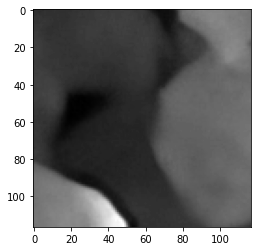

In [43]:

data=np.array(ww[0])
img = Image.fromarray(data.astype('uint8'), mode='L')
plt.imshow(img, cmap = "gray")


In [0]:
Size=28
xw=[]
# xw.append(cv2.resize(cv2.imread(img),(Size,Size)))
# xw.append(cv2.resize(img,(Size,Size)))
img=np.float32(img)
img=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
#print(img)


In [45]:
# predictions = model.predict(xw[0])
#predictions = model.predict(img)
# predictions = model.predict(ww[0])
# result = model.evaluate(np.array(img))
#x=img
x=images28
logits = model(x, training=False)
prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
print(prediction)

tf.Tensor(
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 2 1 4 4 2 4 3 3 3 3 3 3 3 3 3 1
 1 1 1 1 1 1 1 1 4 4 2 2 2 1 2 1 2 2 2 1 4 4 1 1 1 3 3 2 3 3 3 3 3 3 3 1 1
 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 4 1 1 4 2 2 3 3 3 3 3 3 3 3 3 3 1 1 1
 1 1 1 1 4 1 1 3 2 2 2 1 2 2 2 2 2 4 2 4 1 1 2 3 3 3 3 3 3 3 3 3 3 1 2 1 1
 1 1 1 1 1 1 2 2 2 2 2 4 2 4 2 2 4 4 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 2 2 2 4 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 2 2 2 1 2 2
 2 2 2 2 2 2 1 2 4 2 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 2 2 4 2 2 2 3
 2 1 1 2 4 1 1 2 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 4 2 1 2 1 1 3 3
 3 2 3 3 3 3 3 3 1 1 1 1 1 4 1 1 1 1 2 1 4 2 1 2 2 2 4 2 1 4 2 2 2 1 3 3 3
 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 2 2 2 2 1 2 1 2 2 2 4 4 1 2 2 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 2 4 2 1 2 2 3 3 3 2 3 3 3 3 3 3 1 1 1 1 1
 1 1 1 1 3 2 1 1 1 2 2 2 3 3 2 4 4 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 4 2 4 2 2 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 4 1 2 4 4 1 2
 2 2 4 4 1 1 4

In [0]:
#num_classes=4
#confusion = tf.confusion_matrix(labels=y, predictions=prediction, num_classes=num_classes)
#print(confusion)

In [47]:
data = {'y_Actual': y_valor,
        'y_Predicted': prediction
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
print (df)

     y_Actual  y_Predicted
0           1            1
1           1            1
2           1            1
3           1            1
4           1            1
..        ...          ...
877         4            1
878         4            1
879         4            2
880         4            1
881         4            4

[882 rows x 2 columns]


In [53]:
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted    1    2    3   4
Actual                      
1          342    8    2   8
2           29  112   17  22
3            1    4  172   3
4           62   48    3  49


In [54]:
import sklearn
y_true = df['y_Actual']
y_pred = df['y_Predicted']

print(sklearn.metrics.classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           1       0.79      0.95      0.86       360
           2       0.65      0.62      0.64       180
           3       0.89      0.96      0.92       180
           4       0.60      0.30      0.40       162

    accuracy                           0.77       882
   macro avg       0.73      0.71      0.70       882
weighted avg       0.75      0.77      0.74       882



In [48]:
print(images28.shape)

(882, 28, 28)


In [65]:
np.max(images28[0]*255)


249.68185602678568

In [78]:
print(images28[0])

[[0.00000000e+00 0.00000000e+00 3.15126050e-03 8.51191176e-03
  4.60793137e-02 1.61025042e-01 2.49250184e-01 3.41634307e-01
  4.01509578e-01 4.23633415e-01 4.65139589e-01 5.24040225e-01
  5.42127115e-01 5.29070763e-01 4.93681549e-01 4.76558049e-01
  4.65347289e-01 4.42931576e-01 4.34578025e-01 5.49604450e-01
  6.21819888e-01 6.54017024e-01 6.70046495e-01 6.84038262e-01
  7.01010196e-01 7.21878543e-01 7.29558093e-01 7.25415551e-01]
 [0.00000000e+00 0.00000000e+00 8.96848739e-04 8.16122549e-03
  4.12251689e-02 1.67224662e-01 2.80238257e-01 3.69286356e-01
  4.35752829e-01 4.85960280e-01 5.27570158e-01 5.53342339e-01
  5.62649864e-01 5.32815639e-01 4.94745893e-01 4.72377479e-01
  4.57423235e-01 4.54712674e-01 4.53344647e-01 5.35320392e-01
  6.25544996e-01 6.55161331e-01 6.74394286e-01 6.86376351e-01
  6.96952304e-01 7.21595798e-01 7.35532623e-01 7.38888537e-01]
 [0.00000000e+00 0.00000000e+00 2.27205882e-04 7.47999825e-03
  3.27039497e-02 1.52738102e-01 2.97148733e-01 3.83679309e-01
  4.57

In [79]:
xw=np.array(ww[0])/255
print(xw[0])

[0.18823529 0.18823529 0.18431373 0.18823529 0.18431373 0.17647059
 0.19215686 0.18823529 0.18823529 0.18823529 0.19215686 0.2
 0.19607843 0.19607843 0.19215686 0.19215686 0.19215686 0.18823529
 0.19607843 0.18823529 0.18823529 0.2        0.20784314 0.20392157
 0.20392157 0.2        0.20392157 0.20784314 0.21176471 0.21568627
 0.20784314 0.21568627 0.21568627 0.22352941 0.22745098 0.22745098
 0.23137255 0.23529412 0.23137255 0.23137255 0.22745098 0.23921569
 0.22352941 0.23137255 0.23529412 0.23529412 0.23529412 0.24313725
 0.23921569 0.23529412 0.23529412 0.23529412 0.23529412 0.22352941
 0.22352941 0.21176471 0.21568627 0.21960784 0.21568627 0.21176471
 0.19215686 0.17254902 0.14901961 0.1254902  0.10588235 0.09803922
 0.07843137 0.07058824 0.0745098  0.07843137 0.08235294 0.07843137
 0.07843137 0.09803922 0.10196078 0.1254902  0.16470588 0.23921569
 0.31372549 0.36862745 0.39607843 0.41176471 0.42352941 0.43921569
 0.43529412 0.44313725 0.43529412 0.44313725 0.45882353 0.4745098
 0.

In [0]:
wn=[]
for i in ww:
  xn=i/255
  wn.append(xn)

In [75]:
print(wn[0])

[[0.18823529 0.18823529 0.18431373 ... 0.44313725 0.43137255 0.41568627]
 [0.18823529 0.19215686 0.18431373 ... 0.43529412 0.42352941 0.41568627]
 [0.18823529 0.19215686 0.19607843 ... 0.42352941 0.41960784 0.42352941]
 ...
 [0.43137255 0.43529412 0.43137255 ... 0.30980392 0.29411765 0.27843137]
 [0.42745098 0.42352941 0.43137255 ... 0.2745098  0.2627451  0.24313725]
 [0.42352941 0.42352941 0.42745098 ... 0.23529412 0.21960784 0.20392157]]


In [74]:

#x=np.array(wn)
x=wn
logits = model(x, training=False)
prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
print(prediction)
''''''

InvalidArgumentError: ignored

AttributeError: ignored

In [51]:
img.size

784

In [0]:
#print(xw)